<a href="https://colab.research.google.com/github/Saroramath/MachineLearning/blob/main/6205A1Q2Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import numpy as np

## Importing the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TitanicData.csv to TitanicData.csv


In [84]:
df = pd.read_csv(io.StringIO(uploaded['TitanicData.csv'].decode('utf-8')))

## Knowing the data

In [85]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
df.Fare[df.Fare==0].count()

15

In [88]:
df.Age[df.Age==0].count()

0

In [89]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [90]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

We observe that the data-types use in each colums:
Column | Data Type | Usage/Observation
--- | --- | ---
Survived | Integer | Classify 0: Died, 1: survived
Pclass | Integer | Classify 1: First class 2: Second class 3: Third class
Name | string | somename, **Title.** name
Sex| string| male female
Age| float| Numeric, It has null values
SibSp| Integer| Number of siblings
Parch| Integer| Number of parents 
Ticket| String|
Fare| Float| Numeric, 15 values equal to zero
Cabin| String|
Embarked| Character| Port of boarding: S B C



## Analyze and visualize the data

**Gender of pasengers on board among different agaes.**

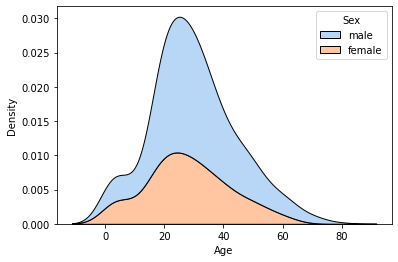

In [91]:
sns.kdeplot(data=df, x='Age', hue='Sex', multiple="stack",palette='pastel')

**Survival rate among different genders.**

In [92]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**Survival rate among genders across different ages.**

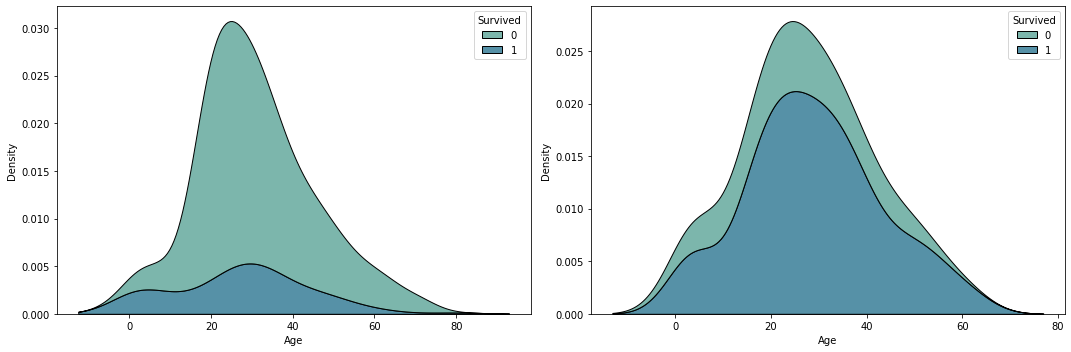

In [93]:
fig, axes = plt.subplots(1, 2,figsize=(15, 5))
sns.kdeplot(data=df[df['Sex']=='male'], x='Age', hue='Survived', multiple="stack", ax=axes[0],palette='crest')
sns.kdeplot(data=df[df['Sex']=='female'], x='Age', hue='Survived', multiple="stack",ax=axes[1],palette='crest')

plt.tight_layout()

We can observe that the survival rate is quite high among females. Also, among both genders it is much better for children and older in comparison to adults. These differences indicate that the Age and Sex are good features to predict the survival.

**Survival rate among passengers travelleing in different class.**

In [94]:
df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


This indicates that chances of survival are significantly better for passengers in First class in comparison to third class. Let's visualize this across different ages.

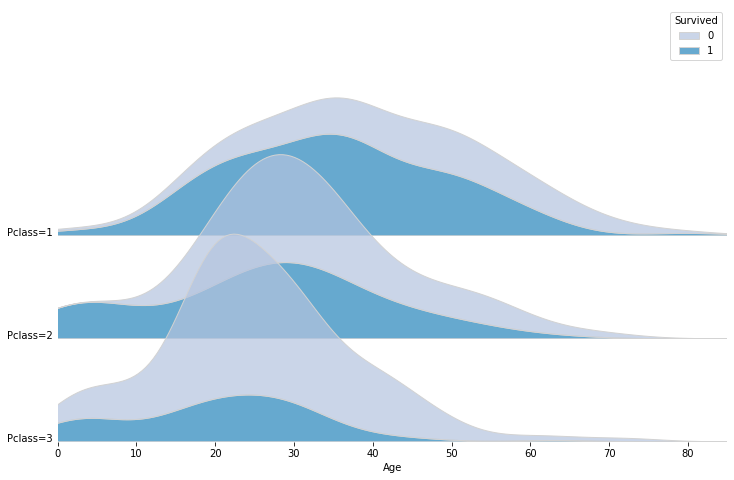

In [95]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])

axes = [ax1,ax2,ax3]

gs.update(hspace= -0.55)
sns.kdeplot(data=df[df['Pclass']==1], x='Age', hue='Survived', multiple="stack", ax=axes[0], palette='PuBu', alpha=0.7, edgecolor='lightgray')
sns.kdeplot(data=df[df['Pclass']==2], x='Age', hue='Survived', multiple="stack",ax=axes[1], palette='PuBu', alpha=0.7, edgecolor='lightgray')
sns.kdeplot(data=df[df['Pclass']==3], x='Age', hue='Survived', multiple="stack",ax=axes[2], palette='PuBu', alpha=0.7, edgecolor='lightgray')

axes[0].set_yticks([]) #Remove the y axis label
axes[1].set_yticks([])
axes[2].set_yticks([])

spines = ["top","right","left","bottom"] # Remove the boxes
for s in spines:
        axes[0].spines[s].set_visible(False)
        
for s in spines:
        axes[1].spines[s].set_visible(False)

for s in spines:
        axes[2].spines[s].set_visible(False)


######### Remove the legend
axes[2].get_legend().remove()
axes[1].get_legend().remove()

############ Remove the Y label
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

### Remove the x labels and xticks  on other
axes[0].set_xlabel('')
axes[1].set_xlabel('')

axes[0].set_xticks([]) 
axes[1].set_xticks([])


#### Remove the background
axes[1].patch.set_alpha(0)
axes[2].patch.set_alpha(0)

axes[0].text(-0.2,0,'Pclass=1 ',ha="right")
axes[1].text(-0.2,0,'Pclass=2 ',ha="right")# Add the text on bottom
axes[2].text(-0.2,0,'Pclass=3 ', ha="right")

### Resize the plots
axes[1].set_ylim(0, 0.04)
axes[0].set_ylim(0, 0.04)
axes[2].set_ylim(0, 0.04)

axes[0].set_xlim(0, 85)
axes[1].set_xlim(0, 85)
axes[2].set_xlim(0, 85)



plt.show()

In [96]:
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


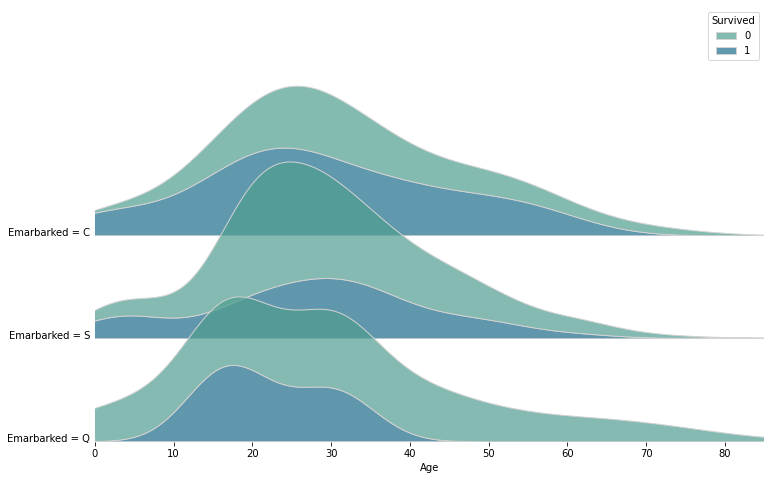

In [97]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])

axes = [ax1,ax2,ax3]

gs.update(hspace= -0.55)
sns.kdeplot(data=df[df['Embarked']=='C'], x='Age', hue='Survived', multiple="stack", ax=axes[0], palette='crest', alpha=0.7, edgecolor='lightgray')
sns.kdeplot(data=df[df['Embarked']=='S'], x='Age', hue='Survived', multiple="stack",ax=axes[1], palette='crest', alpha=0.7, edgecolor='lightgray')
sns.kdeplot(data=df[df['Embarked']=='Q'], x='Age', hue='Survived', multiple="stack",ax=axes[2], palette='crest', alpha=0.7, edgecolor='lightgray')

axes[0].set_yticks([]) #Remove the y axis label
axes[1].set_yticks([])
axes[2].set_yticks([])

spines = ["top","right","left","bottom"] # Remove the boxes
for s in spines:
        axes[0].spines[s].set_visible(False)
        
for s in spines:
        axes[1].spines[s].set_visible(False)

for s in spines:
        axes[2].spines[s].set_visible(False)


######### Remove the legend
axes[2].get_legend().remove()
axes[1].get_legend().remove()

############ Remove the Y label
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

### Remove the x labels and xticks  on other
axes[0].set_xlabel('')
axes[1].set_xlabel('')

axes[0].set_xticks([]) 
axes[1].set_xticks([])


#### Remove the background
axes[1].patch.set_alpha(0)
axes[2].patch.set_alpha(0)

axes[0].text(-0.2,0,'Emarbarked = C ',ha="right")
axes[1].text(-0.2,0,'Emarbarked = S ',ha="right")# Add the text on bottom
axes[2].text(-0.2,0,'Emarbarked = Q ', ha="right")

### Resize the plots
axes[1].set_ylim(0, 0.04)
axes[0].set_ylim(0, 0.04)
axes[2].set_ylim(0, 0.04)

axes[0].set_xlim(0, 85)
axes[1].set_xlim(0, 85)
axes[2].set_xlim(0, 85)



plt.show()

The age group of passengers who embarked at Q indicates a reason for the low rate of survival among this class.

In [98]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [99]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


We can consider using this as a feature

In [100]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


## Preparing the data

Since age is an important feature, we have decided to drop the vallues without age data and zero fare data. Note that, another approach is to fill that data with different methods The k-nearest neighbouhood method is logically a more resonable path, but for keeping the model simple and sticking to original data, we have made the choice to keep only complete data for modelling. Ideal appraoch is to make an esemble of these two approaches

In [101]:
df = df.dropna(subset=['Age'])

In [102]:
df = df.loc[lambda df: df['Fare'] > 0, :] 

In [103]:
df['Sex'].replace({'female':0,'male':1},inplace= True)

In [104]:
df = df.dropna(subset=['Embarked'])

In [105]:
df['Embarked'].replace({'S':1,'C':2,'Q':3},inplace= True)

In [106]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,3,3
Lady,0,1
Major,1,1
Master,15,21
Miss,41,104


No class of title is showing a strong survival rate not already covered by the gender, so we will skip the processing on this data. 

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  705 non-null    int64  
 1   Survived     705 non-null    int64  
 2   Pclass       705 non-null    int64  
 3   Name         705 non-null    object 
 4   Sex          705 non-null    int64  
 5   Age          705 non-null    float64
 6   SibSp        705 non-null    int64  
 7   Parch        705 non-null    int64  
 8   Ticket       705 non-null    object 
 9   Fare         705 non-null    float64
 10  Cabin        181 non-null    object 
 11  Embarked     705 non-null    int64  
 12  FamilySize   705 non-null    int64  
 13  Title        705 non-null    object 
dtypes: float64(2), int64(8), object(4)
memory usage: 82.6+ KB


## Modelling the data

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [109]:
df_train, df_test= train_test_split( df, test_size = 0.2, random_state = 1) #Split the data to use 80% for training the model and 20% to test it.

For a good feature selection, let us consider the correlation map.

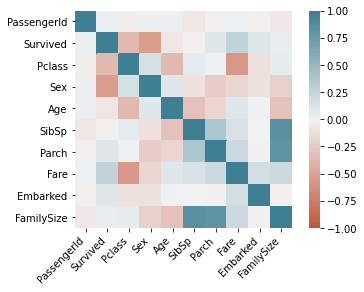

In [110]:
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [111]:
feature = (df.columns.tolist())
feature.remove('PassengerId')
feature.remove('Survived')
feature.remove('Name')
feature.remove('FamilySize')
feature.remove('Title')
feature.remove('Cabin')
feature.remove('Ticket')


In [112]:
feature

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [119]:

logistic_regression = LogisticRegression()
logistic_regression.fit(df_train[feature], df_train['Survived'])
df_pred_survival = logistic_regression.predict(df_test[feature])
acc = accuracy_score(df_test['Survived'], df_pred_survival)
print('Accuracy on the test dataset {}'.format(acc))
print('Averagevg precision_score :',average_precision_score(df_test['Survived'],df_pred_survival))
print('Precision_score :',precision_score(df_test['Survived'],df_pred_survival, average='macro'))
print('Recall :',recall_score(df_test['Survived'],df_pred_survival, average='weighted'))

Accuracy on the test dataset 0.7801418439716312
Averagevg precision_score : 0.6329556967854841
Precision_score : 0.7706131078224101
Recall : 0.7801418439716312


## Experimenting with different feature sets.

In [120]:
feature = ['Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']

logistic_regression = LogisticRegression()
logistic_regression.fit(df_train[feature], df_train['Survived'])
df_pred_survival = logistic_regression.predict(df_test[feature])
acc = accuracy_score(df_test['Survived'], df_pred_survival)
print('Accuracy on the test dataset {}'.format(acc))
print('Averagevg precision_score :',average_precision_score(df_test['Survived'],df_pred_survival))
print('Precision_score :',precision_score(df_test['Survived'],df_pred_survival, average='macro'))
print('Recall :',recall_score(df_test['Survived'],df_pred_survival, average='weighted'))

Accuracy on the test dataset 0.7659574468085106
Averagevg precision_score : 0.6143985447176937
Precision_score : 0.755708245243129
Recall : 0.7659574468085106


In [121]:
feature = ['Fare','Sex','Pclass','Age','SibSp']
logistic_regression = LogisticRegression()
logistic_regression.fit(df_train[feature], df_train['Survived'])
df_pred_survival = logistic_regression.predict(df_test[feature])
acc = accuracy_score(df_test['Survived'], df_pred_survival)
print('Accuracy on the test dataset {}'.format(acc))
print('Averagevg precision_score :',average_precision_score(df_test['Survived'],df_pred_survival))
print('Precision_score :',precision_score(df_test['Survived'],df_pred_survival, average='macro'))
print('Recall :',recall_score(df_test['Survived'],df_pred_survival, average='weighted'))

Accuracy on the test dataset 0.7801418439716312
Averagevg precision_score : 0.6329556967854841
Precision_score : 0.7706131078224101
Recall : 0.7801418439716312


In [122]:
feature = ['Fare','Sex','Pclass','Age','SibSp','Parch'] #second best
logistic_regression = LogisticRegression()
logistic_regression.fit(df_train[feature], df_train['Survived'])
df_pred_survival = logistic_regression.predict(df_test[feature])
acc = accuracy_score(df_test['Survived'], df_pred_survival)
print('Accuracy on the test dataset {}'.format(acc))
print('Averagevg precision_score :',average_precision_score(df_test['Survived'],df_pred_survival))
print('Precision_score :',precision_score(df_test['Survived'],df_pred_survival, average='macro'))
print('Recall :',recall_score(df_test['Survived'],df_pred_survival, average='weighted'))

Accuracy on the test dataset 0.7801418439716312
Averagevg precision_score : 0.6329556967854841
Precision_score : 0.7706131078224101
Recall : 0.7801418439716312


In [123]:
feature = ['Fare','Sex','Pclass','Age','SibSp','Embarked'] #second best
logistic_regression = LogisticRegression()
logistic_regression.fit(df_train[feature], df_train['Survived'])
df_pred_survival = logistic_regression.predict(df_test[feature])
acc = accuracy_score(df_test['Survived'], df_pred_survival)
print('Accuracy on the test dataset {}'.format(acc))
print('Averagevg precision_score :',average_precision_score(df_test['Survived'],df_pred_survival))
print('Precision_score :',precision_score(df_test['Survived'],df_pred_survival, average='macro'))
print('Recall :',recall_score(df_test['Survived'],df_pred_survival, average='weighted'))

Accuracy on the test dataset 0.7801418439716312
Averagevg precision_score : 0.6329556967854841
Precision_score : 0.7706131078224101
Recall : 0.7801418439716312
